# Fitting models to data - peak fitting <a id='top'></a>

This notebook follows on from the LineFitting exercises.  

You should complete the LineFitting notebook before working through this one.

The SciPy `curve_fit()` and `odr()` functions that we used in the LineFitting notebook allow you to define pretty much any model you want to fit your data.

As an example, a Gaussian curve can be defined using three parameters:

$$A \exp{\left(\frac{-(x - x_0)^2}{(2 \sigma^2)}\right)}$$

Where $A$ is its amplitude, $x_0$ its position on the $x$ axis, and $\sigma$ a measure of its width.

A Gaussian curve of this form can be used to model and to fit peaks in spectra - you will encounter these in the Compton experiment in the Physics project, and later in the infrared spectroscopy experiment in the Mars project.

In this notebook, we'll explore how to use the tools available in SciPy to fit a Gaussian model to a sample dataset.  The process involves optimising the parameters in a model function to minimise the sum of squares, in a similar way to the straight line fitting.


## 0 Imports and housekeeping

Before inspecting the data and fitting the model, we'll start by importing the necessary packages - these include the familiar packages NumPy, Pandas and Matplotlib.  In this notebook we will also make use of Bokeh for some of the plotting, simply to gain more experience of using Bokeh (Matplotlib would work here just as well). 

In later cells we will also make use of SciPy for the peak fitting. 

Results are persistent from one cell to another, so remember to run cells in sequence.  Most importantly, we need to import packages before using them.  The next cell does this, as well as setting up some other items that we will use later.

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

# These two lines enable formatted printing of Pandas DataFrames
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1 Data inspection

For the exercises in this notebook, a file with sample data is provided. `PeakData.csv` is a csv file that can be read in using Pandas in the usual way. 

This file represents the type of data that might typically come from a thermally broadened spectral line. The physics of this indicate that a Gaussian should be a good model to use.

The sample dataset was generated using the following values:  $A = 20$, $x_0 = 10$, $\sigma  = 1.0$ with a random $y$ noise value added. 

As in previous examples, the first task is data inspection, so we will start by reading in the file, inspecting the contents of the resulting DataFrame and making a plot of the raw data.

This time, instead of passing the columns to `Matplotlib.pyplot`, we can use the `pandas.DataFrame.plot()` function.  This creates a Matplotlib plot based on the columns in the data frame, and is an example of Pandas and Matplotlib working together.

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Later examples in this notebook will be plotted using Bokeh, to illustrate the different options available.

,x,y
0,0.000000,-0.236563
1,0.306122,-0.743980
2,0.612245,1.069182
3,0.918367,0.337028
4,1.224490,-0.974656


<AxesSubplot: title={'center': 'Sample peak data'}, xlabel='x', ylabel='y'>

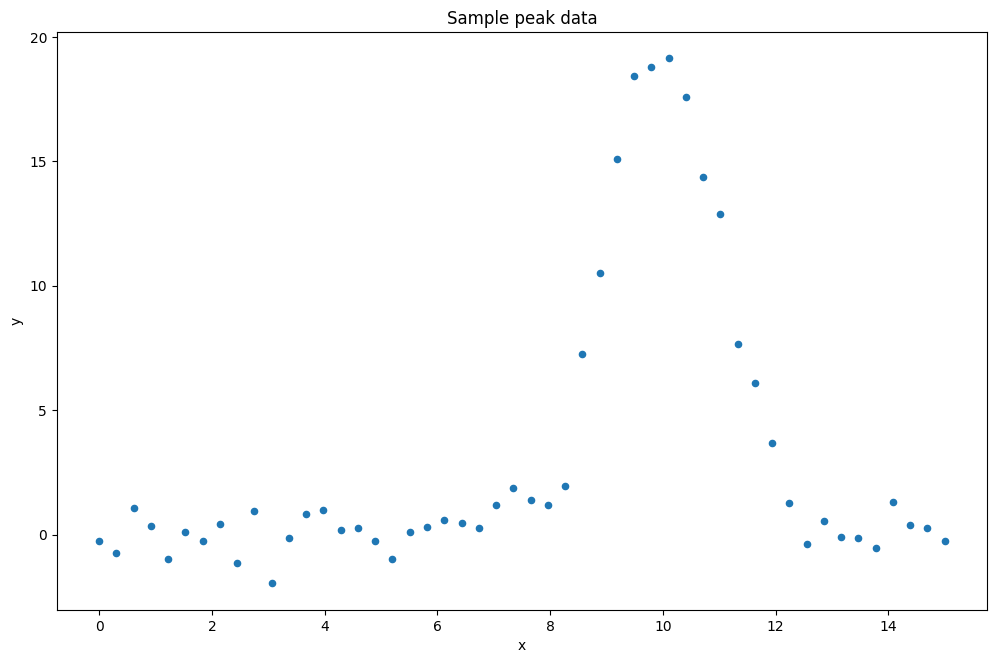

In [14]:
PeakData = pd.read_csv('PeakData.csv')

# Display first few lines of the dataset
PeakData.head()

#Set the size of subsequent Matplotlib plots
plt.rcParams['figure.figsize'] = [12, 7.5]

# This illustrates a different way of plotting the data
# Pandas and Matplotlib work together - this time 
# we use the Pandas DataFrame function plot(), which creates
# a Matplotlib plot
PeakData.plot('x', 'y', kind = 'scatter', title = 'Sample peak data')

## 2 Peak fitting

Fitting a Gaussian model to the peak in the dataset follows a similar process to the line fitting using `scipy.optimize.curvefit()`.  The first step is to define a _model function_.   In this case, the model is a Gaussian curve.  

As with the straight line fit, the model involves a number of parameters (for the Gaussian curve these are $A$, $x_0$ and $\sigma$). The model function will be called repeatedly by `curve_fit()` as it optimises the values of these three parameters.

This time, a list of initial values for these three parameters (p0) is provided as an extra input to the `curve_fit()` function. 

These initial approximate parameters are used by the `curve_fit()` function to use as a starting point for the optimised values. This is optional but can be useful if the dataset is complex or noisy as it can improve the quality and speed of the fit.

In [15]:
# Import the necessary SciPy functions
from scipy.optimize import curve_fit

# Tell Bokeh to display plots in the notebook
output_notebook()

# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss

# Define variables to refer to the x and y data columns
#  - not strictly necessary, but convenient
x  = PeakData['x']
y  = PeakData['y']

# Do the fit - p0 defines starting points for the parameters
p0 = [20, 10, 2]
popt, pcov = curve_fit(GaussModel, x, y, p0)

# As with the straight line fit, popt and pcov 
# contain the optimised parameters and error values
# if you are interested, un-comment the following  lines to print
# these out and inspect the contents
# print(popt)
# print(pcov)

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print (f'A     = {a_fit: .3g}')
print (f'x0    = {x0_fit: .3g}')
print (f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# For readability, extract values from perr into named variables
a_err     = perr[0]
x0_err    = perr[1]
sigma_err = perr[2]

#print fit parameters and error estimates
print()
print('fit parameters with error estimates')
print('***************************************************')
print(f'A     = {a_fit: .3g} +/- {a_err: .3g}')
print(f'x0    = {x0_fit: .3g} +/- {x0_err: .3g}')
print(f'sigma = {sigma_fit: .3g} +/- {sigma_err: .3g}')
print('***************************************************')

# Plot the data points and the optimised curve
# This time using Bokeh to generate an interactive plot
p1 = figure(title = "Fitting a Gaussian to data", 
            x_axis_label = 'x', 
            y_axis_label = 'y')

p1.scatter(x, y, legend_label = "Data")

p1.line(x, GaussModel(x, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)


Loading BokehJS ...

fit parameters
***************************************************
A     =  19.7
x0    =  10
sigma =  0.994
***************************************************

fit parameters with error estimates
***************************************************
A     =  19.7 +/-  0.429
x0    =  10 +/-  0.0249
sigma =  0.994 +/-  0.0249
***************************************************


GlyphRenderer(id='p1102', ...)

GlyphRenderer(id='p1115', ...)

### 2.1 Constraining the fit
Although we have not needed it so far, `curve_fit()` allows you to set bounds for the optimised parameters. For example the physical properties of the system under investigation might mean that there will be a maximum width for any peak, or you might want to ignore Gaussians that are too small in height, and so on. 

The official documentation for `curve_fit()` explains how to set bounds:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html.

Bounds are specified by including a `bounds = (...)` parameter in the call to `curve_fit()`.  This specifies the lower and upper limits to the values of the fitting parameters, constraining the fit to be within those bounds:

`bounds = ([a_lower, x_0_lower, sigma_lower], [a_upper, x_0_upper, sigma_upper])`

The bounds are set by specifying a tuple (round brackets) containing two lists (square brackets), one for the lower and one for the upper bounds.  Each list is in the same format as the list `p0`, containing values for the three fit parameters.

You can try this in Exercise 2.2.  Alternatively, there is an example of setting bounds in Section 3.1.

### 2.2 Optional exercise - setting bounds

As an optional exercise, try modifying the example in the previous cell to see the effect of changing the initial values and of setting bounds on the fitted parameters.  

Enter your solution in the next cell. Start by copying to program from the cell above, then modify the `curve_fit()` call by adding a `bounds = (...)` parameter.  Try varying the upper and lower values of the bounds and compare the resulting fits with the original fit above. What happens if the initial values or the constraints are too far from the values for the actual peak ?

In [40]:
# Write your solution here
# Import the necessary SciPy functions
from scipy.optimize import curve_fit

# Tell Bokeh to display plots in the notebook
output_notebook()

# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss

# Define variables to refer to the x and y data columns
#  - not strictly necessary, but convenient
x  = PeakData['x']
y  = PeakData['y']

# Do the fit - p0 defines starting points for the parameters
p0 = [56, 10, 2]
popt, pcov = curve_fit(GaussModel, x, y, p0, bounds=([30,9,1],[60,11,3]))

# As with the straight line fit, popt and pcov 
# contain the optimised parameters and error values
# if you are interested, un-comment the following  lines to print
# these out and inspect the contents
# print(popt)
# print(pcov)

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print (f'A     = {a_fit: .3g}')
print (f'x0    = {x0_fit: .3g}')
print (f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# For readability, extract values from perr into named variables
a_err     = perr[0]
x0_err    = perr[1]
sigma_err = perr[2]

#print fit parameters and error estimates
print()
print('fit parameters with error estimates')
print('***************************************************')
print(f'A     = {a_fit: .3g} +/- {a_err: .3g}')
print(f'x0    = {x0_fit: .3g} +/- {x0_err: .3g}')
print(f'sigma = {sigma_fit: .3g} +/- {sigma_err: .3g}')
print('***************************************************')

# Plot the data points and the optimised curve
# This time using Bokeh to generate an interactive plot
p1 = figure(title = "Fitting a Gaussian to data", 
            x_axis_label = 'x', 
            y_axis_label = 'y')

p1.scatter(x, y, legend_label = "Data")

p1.line(x, GaussModel(x, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)



Loading BokehJS ...

fit parameters
***************************************************
A     =  30
x0    =  10
sigma =  1
***************************************************

fit parameters with error estimates
***************************************************
A     =  30 +/-  1.89
x0    =  10 +/-  0.0729
sigma =  1 +/-  0.0729
***************************************************


GlyphRenderer(id='p1808', ...)

GlyphRenderer(id='p1821', ...)

## 3 Fitting multiple peaks

So far we have looked at a dataset containing a single peak. What happens if we have more than one peak in the data ?   For instance, the data in the Compton experiment will have peaks corresponding to two different X-ray energies, together with some smaller peaks, and in the Mars project you will look at infrared spectra potentially containing multiple peaks.
 
To explore how to handle this situation, we'll use synthesised data set, `TwinPeaks.csv` that contains two peaks. Make sure that this file is in the same folder as this notebook.

We will look at three different approaches: using bounds to constrain the fit, selecting a region of interest, and building a more complex model.  Before looking at these we will set up our imports and inspect the data in the usual way (we'll import everything again so that the following examples can be run by themselves without having to run through all of the earlier cells in the notebook).

Loading BokehJS ...

,wavelength,intensity
0,5001,0
1,5002,1
2,5003,0
3,5004,3
4,5005,13


<AxesSubplot: title={'center': 'Sample dataset with two peaks'}, xlabel='wavelength', ylabel='intensity'>

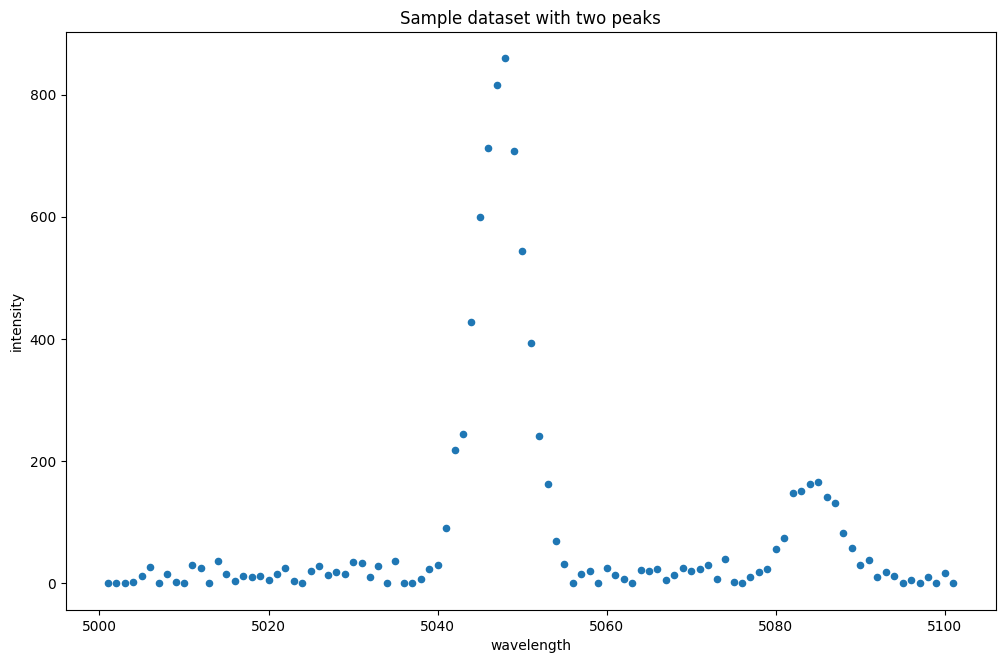

In [41]:
# Set up imports and other housekeeping
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show
output_notebook()

# These two lines enable formatted printing of Pandas DataFrames
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

TwinPeakData = pd.read_csv('TwinPeaks.csv')

# Display first few lines of the dataset
TwinPeakData.head()

#Set the size of subsequent Matplotlib plots
plt.rcParams['figure.figsize'] = [12, 7.5]

# This illustrates a different way of plotting the data
# Pandas and Matplotlib work together - this time 
# we use the Pandas DataFrame function plot(), which creates
# a Matplotlib plot
TwinPeakData.plot('wavelength', 'intensity', kind = 'scatter', 
                  title = 'Sample dataset with two peaks')

The data inspection plot shows that there are two peaks that need fitting here - one (call it peak A) around channel 5050 and one (peak B)around channel 5085. We can also see that the first peak has a height of around 900 intensity units and a FWHM (Full Width Half Max) of around 10 wavelength units, with the second peak having a height of about 200 and a FWHM of 10.

(The Full Width Half Max (FWHM) is approximately $2.35 \sigma$ )

### 3.1 Use constraints

The first approach involves using the initial parameters and bounds to constrain  `curve_fit()` to optimise for one peak or the other. 

The program in the following cell uses bounds to ensure that `curve_fit()` fits the model to Peak A.

Refer to Section 2.1 for more details on setting bounds.

In the following program, the bounds are specified by setting up lists for the lower and upper bounds.  These are then included in the `bounds = (...)` parameter within the call to `curve_fit`.

In [42]:
# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss

TwinPeakData = pd.read_csv('TwinPeaks.csv')

# Define variables to refer to the x and y data columns
#  - not strictly necessary, but convenient
x  = TwinPeakData['wavelength']
y  = TwinPeakData['intensity']

# Specify starting parameters that approximately match Peak A
p0 = [900, 5050, 4]
# Specify lower and upper bounds. Each is a list of the three values
p_lower = [500, 5040, 1]
p_upper = [1200, 5060, 10]

# The bounds constrain fit to region of Peak A
# The bounds are specified as a tuple with two elements.  
# The first is a list of the lower bounds of the 
# three parameters, and the second a list of the upper bounds
popt, pcov = curve_fit(GaussModel, x, y, p0, bounds = (p_lower, p_upper))

# TODO: Change the initial values and bounds to match Peak B
#
# TODO: Modify the program to prompt the user to specify values

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print (f'A     = {a_fit: .3g}')
print (f'x0    = {x0_fit: .3g}')
print (f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# For readability, extract values from perr into named variables
a_err     = perr[0]
x0_err    = perr[1]
sigma_err = perr[2]

#print fit parameters and error estimates
print()
print('fit parameters with error estimates')
print('***************************************************')
print(f'A     = {a_fit: .3g} +/- {a_err: .3g}')
print(f'x0    = {x0_fit: .3g} +/- {x0_err: .3g}')
print(f'sigma = {sigma_fit: .3g} +/- {sigma_err: .3g}')
print('***************************************************')

# Plot the data points and the optimised curve
# This time using Bokeh to generate an interactive plot
p1 = figure(title = "Fitting a Gaussian to data", 
            x_axis_label = "Wavelength (Angstroms)", 
            y_axis_label = "Intensity")

p1.scatter(x,y, legend_label = "Data")

p1.line(x, GaussModel(x, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")
# Mark centreline
p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centreline")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)


fit parameters
***************************************************
A     =  826
x0    =  5.05e+03
sigma =  2.98
***************************************************

fit parameters with error estimates
***************************************************
A     =  826 +/-  23.3
x0    =  5.05e+03 +/-  0.0972
sigma =  2.98 +/-  0.0972
***************************************************


GlyphRenderer(id='p1870', ...)

GlyphRenderer(id='p1883', ...)

GlyphRenderer(id='p1895', ...)

### 3.2 Exercise - use constraints to fit to Peak B

Copy the program from 3.1 and modify the initial values and bounds to constrain `curve_fit()` to fitting Peak B.

You may also wish to modify the program so that it prompts the user to specify values for the constraints.

In [43]:
# Write your solution here

# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss

TwinPeakData = pd.read_csv('TwinPeaks.csv')

# Define variables to refer to the x and y data columns
#  - not strictly necessary, but convenient
x  = TwinPeakData['wavelength']
y  = TwinPeakData['intensity']

# Specify starting parameters that approximately match Peak B
p0 = [180, 5090, 4]
# Specify lower and upper bounds. Each is a list of the three values
p_lower = [150, 5070, 1]
p_upper = [200, 5100, 10]

# The bounds constrain fit to region of Peak A
# The bounds are specified as a tuple with two elements.  
# The first is a list of the lower bounds of the 
# three parameters, and the second a list of the upper bounds
popt, pcov = curve_fit(GaussModel, x, y, p0, bounds = (p_lower, p_upper))

# TODO: Change the initial values and bounds to match Peak B
#
# TODO: Modify the program to prompt the user to specify values

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print (f'A     = {a_fit: .3g}')
print (f'x0    = {x0_fit: .3g}')
print (f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov)) # squares of the error values are 
                              # on the covariance matrix diagonal

# For readability, extract values from perr into named variables
a_err     = perr[0]
x0_err    = perr[1]
sigma_err = perr[2]

#print fit parameters and error estimates
print()
print('fit parameters with error estimates')
print('***************************************************')
print(f'A     = {a_fit: .3g} +/- {a_err: .3g}')
print(f'x0    = {x0_fit: .3g} +/- {x0_err: .3g}')
print(f'sigma = {sigma_fit: .3g} +/- {sigma_err: .3g}')
print('***************************************************')

# Plot the data points and the optimised curve
# This time using Bokeh to generate an interactive plot
p1 = figure(title = "Fitting a Gaussian to data", 
            x_axis_label = "Wavelength (Angstroms)", 
            y_axis_label = "Intensity")

p1.scatter(x,y, legend_label = "Data")

p1.line(x, GaussModel(x, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")
# Mark centreline
p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centreline")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)


fit parameters
***************************************************
A     =  169
x0    =  5.08e+03
sigma =  3.11
***************************************************

fit parameters with error estimates
***************************************************
A     =  169 +/-  100
x0    =  5.08e+03 +/-  2.14
sigma =  3.11 +/-  2.14
***************************************************


GlyphRenderer(id='p1944', ...)

GlyphRenderer(id='p1957', ...)

GlyphRenderer(id='p1969', ...)

### 3.3 Isolate the specific area of interest.

An alternative approach would be to isolate the area of interest by passing a limited range of the data to `curve_fit()`.  To do this, we'll create a subset of the full spectrum containing just the values in the region of the peak we are interested in.  This can be done using the Pandas `loc` function to specify a slice of the dataset.

This time, we will prompt the user to enter these values:

1. An estimate of the $x$ position of the peak of interest.
2. An estimate of the height.
3. An estimate of the FWHM

The FWHM value will allow us to isolate a slice of data and also give us an initial value for $\sigma$.

In [53]:
# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss


TwinPeakData = pd.read_csv('TwinPeaks.csv')

for peak in ["A", "B"]:

        # Ask user to specify initial values
        a_est    = float(input(f'Estimated peak {peak} height: '))
        x0_est   = int(input(f'Estimated peak {peak} position: '))
        FWHM_est = float(input(f'Estimated peak {peak} FWHM: '))


        # Calculate an estimated sigma using FWHM approx = 2.35*sigma
        sigma_est = FWHM_est/2.35

        # We need to re-index the DataFrame on the channel data 
        # This is necessary so that we can slice the data based on the displayed wavelength rather
        # than the actual data index.
        TwinPeakData.set_index('wavelength', inplace = True, drop = False)

        # x and y contain the full data columns
        x  = TwinPeakData['wavelength']
        y  = TwinPeakData['intensity']

        # Slice out region of interest
        x_range = TwinPeakData['wavelength'].loc[x0_est-FWHM_est : x0_est+FWHM_est]
        y_range = TwinPeakData['intensity'].loc[x0_est-FWHM_est : x0_est+FWHM_est]

        # Only data points in region of the peak are sent to curve_fit()
        popt, pcov = curve_fit(GaussModel, x_range, y_range, p0 = [a_est, x0_est, sigma_est])

        # For readability, extract values from popt into named variables
        a_fit     = popt[0]
        x0_fit    = popt[1]
        sigma_fit = popt[2]

        print('fit parameters')
        print('***************************************************')
        print(f'A     = {a_fit: .3g}')
        print(f'x0    = {x0_fit: .3g}')
        print(f'sigma = {sigma_fit: .3g}')
        print('***************************************************')

        # Plot the data with the optimised curve (Bokeh):
        p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
                x_axis_label = "Wavelength (Angstroms)", 
                y_axis_label = "Intensity")

        # Plot entire range in light grey colour
        p1.scatter(x, y, legend_label = "Data", color = "#D0D0D0")
        # lot selected range in blue
        p1.scatter(x_range, y_range, legend_label = "Sample", color = "blue")

        # Plot fitted line just for the selected range
        p1.line(x_range, GaussModel(x_range, a_fit, x0_fit, sigma_fit), 
                color = "red", 
                line_dash = "dashed", 
                legend_label = "Optimised curve")

        # Mark centreline
        p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
                color = "blue", 
                line_dash = "dotted", 
                legend_label = "Centreline")

        p1.legend.location = "top_left"
        p1.legend.click_policy = "hide"

        show(p1)


fit parameters
***************************************************
A     =  831
x0    =  5.05e+03
sigma =  2.94
***************************************************


GlyphRenderer(id='p2456', ...)

GlyphRenderer(id='p2469', ...)

GlyphRenderer(id='p2481', ...)

GlyphRenderer(id='p2493', ...)

fit parameters
***************************************************
A     =  167
x0    =  5.08e+03
sigma =  3.48
***************************************************


GlyphRenderer(id='p2544', ...)

GlyphRenderer(id='p2557', ...)

GlyphRenderer(id='p2569', ...)

GlyphRenderer(id='p2581', ...)


You could now repeat for peak B - either by running the program again or by putting the whole thing in a loop.



### 3.4 Create a more complex model

We can also approach the problem by using more complex model that actually has two Gaussians built in.

As before we could prompt the user for the initial estimates. Here, however, for brevity we'll hard-code them.

In [52]:
# define a model with two Gaussians, one for each peak
def TwinGaussModel(x, a1, x10, sigma1, a2, x20, sigma2):
    y_gauss = a1*np.exp(-(x-x10)**2/(2*sigma1**2)) + a2*np.exp(-(x-x20)**2/(2*sigma2**2))
    return y_gauss

# Peak A
a1_est = 900
x10_est = 5050
sigma1_est = 4.0

# Peak B
a2_est = 200
x20_est = 5080
sigma2_est = 4.0

TwinPeakData = pd.read_csv('TwinPeaks.csv')

# Define list of starting parameters
p0 = [a1_est, x10_est, sigma1_est, a2_est, x20_est, sigma2_est]

# x and y contain the full data columns
x  = TwinPeakData['wavelength']
y  = TwinPeakData['intensity']

# do the fit
popt, pcov = curve_fit(TwinGaussModel, x, y, p0)

a1_fit = popt[0]
x10_fit = popt[1]
sigma1_fit = popt[2]

a2_fit = popt[3]
x20_fit = popt[4]
sigma2_fit = popt[5]

# Print out optimised parameters
print('fit parameters')
print('***************************************************')
print('Peak A:')
print(f'A     = {a1_fit: .3g}')
print(f'x0    = {x10_fit: .3g}')
print(f'sigma = {sigma1_fit: .3g}')
print('Peak B:')
print(f'A     = {a2_fit: .3g}')
print(f'x0    = {x20_fit: .3g}')
print(f'sigma = {sigma2_fit: .3g}')
print('***************************************************')
print(f'Peaks are at wavelengths of {x10_fit:.0f} and {x20_fit:.0f} Angstroms')
print('***************************************************')


# Plot the data with the optimised curve (Bokeh):
p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
          x_axis_label = "Wavelength (Angstroms)", 
          y_axis_label = "Intensity")

p1.scatter(x, y, legend_label = "Data")
p1.line(x, TwinGaussModel(x, a1_fit, x10_fit, sigma1_fit, \
                          a2_fit, x20_fit, sigma2_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")

# Mark centrelines
p1.line((x10_fit, x10_fit),(0, a1_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centre Peak A")

p1.line((x20_fit, x20_fit),(0, a2_fit*1.10),
        color = "green", 
        line_dash = "dotted", 
        legend_label = "Centre Peak B")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)

fit parameters
***************************************************
Peak A:
A     =  826
x0    =  5.05e+03
sigma =  2.98
Peak B:
A     =  169
x0    =  5.08e+03
sigma =  3.11
***************************************************
Peaks are at wavelengths of 5047 and 5085 Angstroms
***************************************************


GlyphRenderer(id='p2370', ...)

GlyphRenderer(id='p2383', ...)

GlyphRenderer(id='p2395', ...)

GlyphRenderer(id='p2407', ...)


### 3.5 Exercise: automatically detect peak

As an alternative to prompting the user to specify the approximate positions, height and width of the peaks, you may wish to try detecting the peaks automatically.  This could be done, for example, by finding the maximum intensity value in the data, and where it occurs.

You can do this using the Pandas functions `max()` to find the maximum value in a range of data, and `idxmax()` to find the corresponding index of that maximum value.  These would give initial values for the peak height `a_est` and position `xo_est`.

To try this, modify this copy of the program from Section 3.3, replacing the user input statements with statements to find the peak height and position.  

For simplicity here we have used a fixed value of 20 for FWHM_Est.  As an optional exercise, you may wish to try scanning either side of the peak value to find this automatically as well. 

In [ ]:
# Write your solution here

In [62]:
# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss


TwinPeakData = pd.read_csv('TwinPeaks.csv')

# Instead of prompting user, set fixed value of FWHM
FWHM_est = 20  # Fixed estimate for FWHM

# Initial values of peak height and position will be found automatically
# This must be done after re-indexing so that the position is given as
#   an actual wavelength rather than an index number

# Calculate an estimated sigma using FWHM approx = 2.35*sigma
sigma_est = FWHM_est/2.35

# We need to re-index the DataFrame on the channel data 
# This is necessary so that we can slice the data based on the displayed wavelength rather
# than the actual data index.
TwinPeakData.set_index('wavelength', inplace = True, drop = False)

# x and y contain the full data columns
x  = TwinPeakData['wavelength']
y  = TwinPeakData['intensity']

## TODO: use max() and idxmax() on the intensity column to find the peak height and position
## Complete the following two lines where indicated   
a_est = max(y)
x0_est = x[y==a_est].values[0]

# Slice out region of interest
x_range = TwinPeakData['wavelength'].loc[x0_est-FWHM_est : x0_est+FWHM_est]
y_range = TwinPeakData['intensity'].loc[x0_est-FWHM_est : x0_est+FWHM_est]

# Only data points in region of the peak are sent to curve_fit()
popt, pcov = curve_fit(GaussModel, x_range, y_range, p0 = [a_est, x0_est, sigma_est])

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print(f'A     = {a_fit: .3g}')
print(f'x0    = {x0_fit: .3g}')
print(f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Plot the data with the optimised curve (Bokeh):
p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
          x_axis_label = "Wavelength (Angstroms)", 
          y_axis_label = "Intensity")

# Plot entire range in light grey colour
p1.scatter(x, y, legend_label = "Data", color = "#D0D0D0")
# lot selected range in blue
p1.scatter(x_range, y_range, legend_label = "Sample", color = "blue")

# Plot fitted line just for the selected range
p1.line(x_range, GaussModel(x_range, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")

# Mark centreline
p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centreline")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"

show(p1)


fit parameters
***************************************************
A     =  826
x0    =  5.05e+03
sigma =  2.98
***************************************************


GlyphRenderer(id='p2706', ...)

GlyphRenderer(id='p2719', ...)

GlyphRenderer(id='p2731', ...)

GlyphRenderer(id='p2743', ...)


### 3.6 Optional exercise: automatically detect both peaks

The example in 3.5 works to find the largest peak in the scan.

As a further optional exercise, try modifying the program from 3.4 in a similar way to find both peak A and peak B.

Copy the program from 3.4 into the cell below and modify as needed.


## 4 Conclusions and taking it further

In this notebook, we have seen how to use `scipy.optimise.curve_fit()` to fit increasingly complex curves to a set of data, and specifically to fit a model involving Gaussian peaks to peaks in a simulated spectrum.

We've seen that there is more than one way to solve this particular problem, and - as is often the case in using Python - it is case of choosing the best tool for the job.

As you work through the next experimental project, try to look for opportunities to use the techniques that you have seen in these LineFitting and PeakFitting notebooks.  You could try using appropriate functions to model and fit data from the e/m experiment and use the Gaussian peak fitting to find peaks in the X-ray spectra from the Compton experiment. 

You may also wish to adapt these examples to take account of the error bars in your Compton X-ray spectra.

[Top](#top)

By Marco


In [54]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, show

# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss

# Read your CSV data using pandas DataFrame
TwinPeakData = pd.read_csv('prova espep Xray.csv', sep=';')

# Define variables to refer to the x and y data columns
x  = TwinPeakData['Energy/keV']
y  = TwinPeakData['Counts']

# Specify the initial values and bounds
p0 = [284, 17.8, 0.1]
p_lower = [0, 17.2, 0.01]
p_upper = [300, 18, 1]

# The bounds constrain fit to region of Peak A
popt, pcov = curve_fit(GaussModel, x, y, p0, bounds = (p_lower, p_upper))

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print (f'A     = {a_fit: .3g}')
print (f'x0    = {x0_fit: .3g}')
print (f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Calculate the errors on the returned parameters
perr = np.sqrt(np.diag(pcov))

# For readability, extract values from perr into named variables
a_err     = perr[0]
x0_err    = perr[1]
sigma_err = perr[2]

#print fit parameters and error estimates
print()
print('fit parameters with error estimates')
print('***************************************************')
print(f'A     = {a_fit: .3g} +/- {a_err: .3g}')
print(f'x0    = {x0_fit: .3g} +/- {x0_err: .3g}')
print(f'sigma = {sigma_fit: .3g} +/- {sigma_err: .3g}')
print('***************************************************')

# Plot the data points and the optimised curve
p1 = figure(title = "Fitting a Gaussian to data", 
            x_axis_label = "Energy/keV", 
            y_axis_label = "Counts")

p1.scatter(x,y, legend_label = "Data")

p1.line(x, GaussModel(x, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")
# Mark centreline
p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centreline")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"
show(p1)

fit parameters
***************************************************
A     =  282
x0    =  17.8
sigma =  0.113
***************************************************

fit parameters with error estimates
***************************************************
A     =  282 +/-  1.84
x0    =  17.8 +/-  0.000855
sigma =  0.113 +/-  0.000854
***************************************************


GlyphRenderer(id='p2632', ...)

GlyphRenderer(id='p2645', ...)

GlyphRenderer(id='p2657', ...)

by me

In [66]:
TwinPeakData.columns

Index(['Energy/keV', 'Counts', 'Counts error '], dtype='object')

In [82]:
# define a Gaussian model
def GaussModel(x, a, x0, sigma):
    y_gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return y_gauss


TwinPeakData = pd.read_csv('prova espep Xray.csv', sep=';')


TwinPeakData.set_index('Energy/keV', inplace = True, drop = False)
TwinPeakData.sort_index(inplace=True)

# Instead of prompting user, set fixed value of FWHM
FWHM_est = 18  # Fixed estimate for FWHM

# Initial values of peak height and position will be found automatically
# This must be done after re-indexing so that the position is given as
#   an actual wavelength rather than an index number

# Calculate an estimated sigma using FWHM approx = 2.35*sigma
sigma_est = FWHM_est/2.35

# We need to re-index the DataFrame on the channel data 
# This is necessary so that we can slice the data based on the displayed wavelength rather
# than the actual data index.
#TwinPeakData.set_index('wavelength', inplace = True, drop = False)

# x and y contain the full data columns
x  = TwinPeakData['Energy/keV']
y  = TwinPeakData['Counts']


In [83]:

## TODO: use max() and idxmax() on the intensity column to find the peak height and position
## Complete the following two lines where indicated   
a_est = max(y)
x0_est = x[y==a_est].values[0]

# Slice out region of interest
#x_range = TwinPeakData['Energy/keV'].loc[x0_est-FWHM_est : x0_est+FWHM_est]
#y_range = TwinPeakData['Counts'].loc[x0_est-FWHM_est : x0_est+FWHM_est]

# Only data points in region of the peak are sent to curve_fit()
popt, pcov = curve_fit(GaussModel, x_range, y_range, p0 = [a_est, x0_est, sigma_est])

# For readability, extract values from popt into named variables
a_fit     = popt[0]
x0_fit    = popt[1]
sigma_fit = popt[2]

print('fit parameters')
print('***************************************************')
print(f'A     = {a_fit: .3g}')
print(f'x0    = {x0_fit: .3g}')
print(f'sigma = {sigma_fit: .3g}')
print('***************************************************')

# Plot the data with the optimised curve (Bokeh):
p1 = figure(title = "Fitting a Gaussian to multiple peaks", 
          x_axis_label = "Wavelength (Angstroms)", 
          y_axis_label = "Intensity")

# Plot entire range in light grey colour
p1.scatter(x, y, legend_label = "Data", color = "#D0D0D0")
# lot selected range in blue
p1.scatter(x_range, y_range, legend_label = "Sample", color = "blue")

# Plot fitted line just for the selected range
p1.line(x_range, GaussModel(x_range, a_fit, x0_fit, sigma_fit), 
        color = "red", 
        line_dash = "dashed", 
        legend_label = "Optimised curve")

# Mark centreline
p1.line((x0_fit, x0_fit),(0, a_fit*1.10),
        color = "blue", 
        line_dash = "dotted", 
        legend_label = "Centreline")

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"

show(p1)


fit parameters
***************************************************
A     =  282
x0    =  17.8
sigma = -0.113
***************************************************


GlyphRenderer(id='p3484', ...)

GlyphRenderer(id='p3497', ...)

GlyphRenderer(id='p3509', ...)

GlyphRenderer(id='p3521', ...)

In [84]:
TwinPeakData

,Energy/keV,Counts,Counts error
Energy/keV,,,
17.2,17.2,0,0.0
17.3,17.3,0,0.0
17.4,17.4,0,0.0
17.5,17.5,11,3.3
17.6,17.6,55,7.4
17.7,17.7,183,13.5
17.8,17.8,284,16.9
17.9,17.9,194,13.9
18.0,18.0,67,8.2
